# Derivación numérica: diferencias finitas

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [1]:
using PyPlot

function derivada_derecha(f, x=0.0::Float64, h=10^(-8.)::Float64)
    (f(x+h)-f(x))/h
end     

derivada_derecha (generic function with 3 methods)

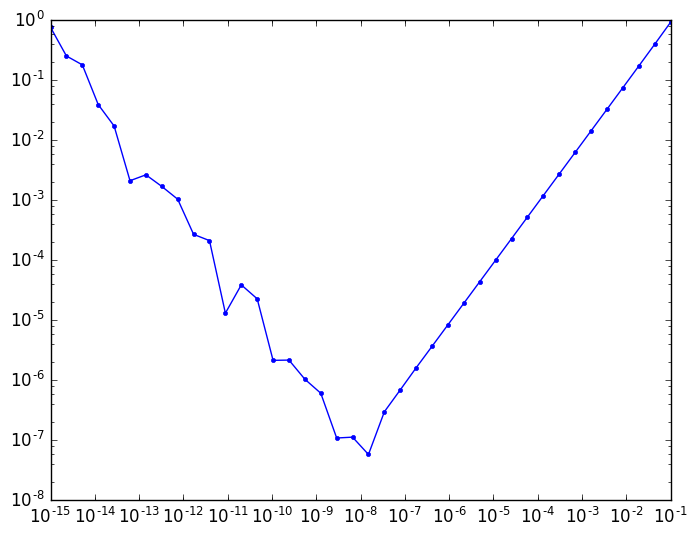

In [2]:
#v_out = Float64[]; for eh in hh
#    h = 10.0^eh
#    push!(v_out,h)
#end

#collect(hh)
#collect(v_out)
#############################

hh = linspace(-15, -1, 40)
derivada_analitica=9

v_1 = similar(hh)
derivder = similar(hh)

for (i,h) in enumerate(hh)
    v_1[i] = 10.0^h
    derivder[i] = derivada_derecha(x -> 3x^3 -2, 1, v_1[i])
end

derivada_error1=abs(derivder - derivada_analitica)
loglog(v_1, derivada_error1, ".-")
show()
#YA FUNCIONO!!!

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [3]:
function derivada_simetrica(f, x=0.0::Float64, h=10^(-8.)::Float64)
    (f(x+h)-f(x-h))/(2*h)
end     

derivada_simetrica (generic function with 3 methods)

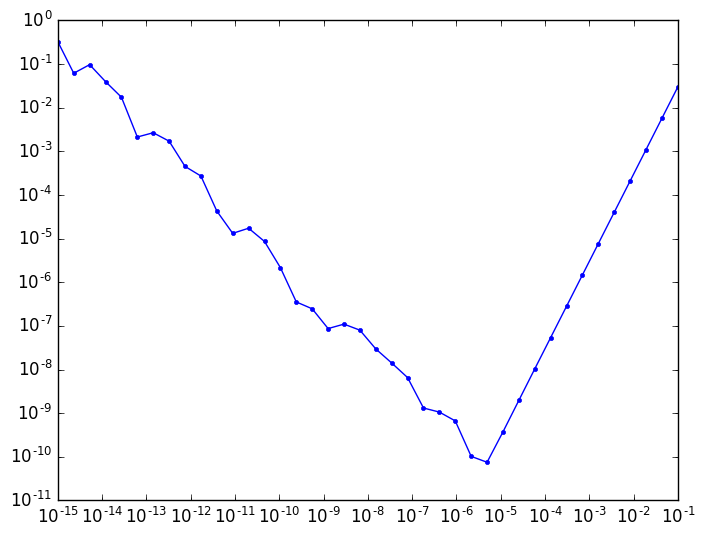

In [4]:
hh = linspace(-15, -1, 40)
derivada_analitica=9

v_2 = similar(hh)
derivsim = similar(hh)

for (i,h) in enumerate(hh)
    v_2[i] = 10.0^h
    derivsim[i] = derivada_simetrica(x -> 3x^3 -2, 1, v_2[i])
end

derivada_error2=abs(derivsim - derivada_analitica)
loglog(v_2, derivada_error2, ".-")
show()
#YA FUNCIONO!!!

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [5]:
function derivada_compleja(f, x=0.0::Float64, h=10^(-8.)::Float64)
    imag(f(x + h*im) / h)
end     

derivada_compleja (generic function with 3 methods)

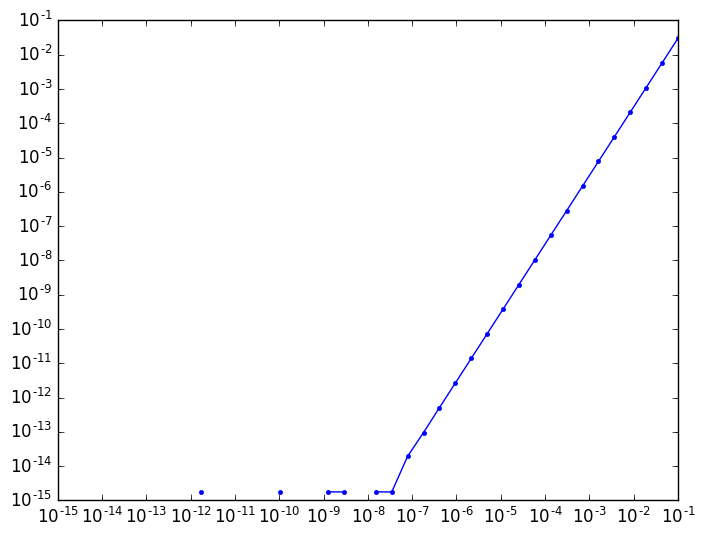

In [6]:
hh = linspace(-15, -1, 40)
derivada_analitica=9

v_3 = similar(hh)
derivcomp = similar(hh)

for (i,h) in enumerate(hh)
    v_3[i] = 10.0^h
    derivcomp[i] = derivada_compleja(x -> 3x^3 -2, 1, v_3[i])
end

derivada_error3=abs(derivcomp - derivada_analitica)
loglog(v_3, derivada_error3, ".-")
show()
#YA FUNCIONO!!!

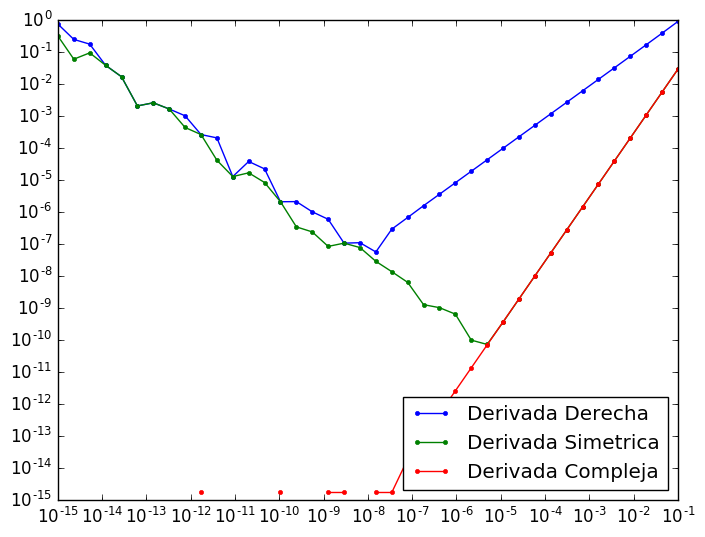

In [7]:
loglog(v_1, derivada_error1, ".-", label="Derivada Derecha")
loglog(v_2, derivada_error2, ".-", label="Derivada Simetrica")
loglog(v_3, derivada_error3, ".-", label="Derivada Compleja")
legend(loc=4)
show()

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

La mejor definición en términos de dar el valor más exacto de la derivada es, sin duda alguna, la de la derivada compleja. Su convergencia, en contraste a los otros métodos, va como $h^2$. Se acerca más a cero y converge más rápidamente.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Se debe al fenomeno conocido como "cancelacion catastrofica". Al hacer calculos con numeros muy pequenos, hay perdida de informacion que ocurre con los numeros flotantes que es cada vez mas notable, perdiendo cifras significativas y tirando al calculo/comportamiento esperado de cabeza. Al haber operaciones que manipulan a los numeros flotantes, el error se amplifica. Resulta que al ser la version compleja la que no tiene una resta adicional, tiene un comportamiento mas como el esperado.
